In [14]:
import cv2
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

In [6]:
# Load the image in grayscale
image1 = tiff.imread('interview_images/premerge.tif')
image2 = tiff.imread('interview_images/t24.tif')

In [7]:
image1.shape,image2.shape

((5, 1024, 1024), (5, 1024, 1024))

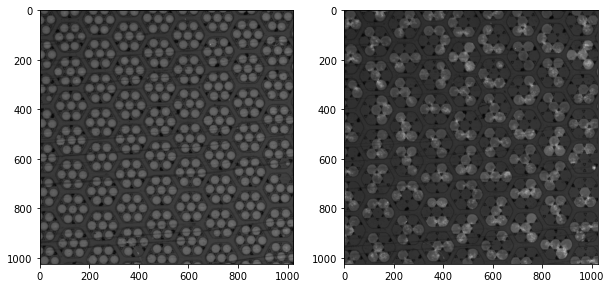

In [207]:
pre_c1=image1[0,:,:]
post_c1=image2[0,:,:]
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(pre_c1,cmap='gray')
ax[1].imshow(post_c1,cmap='gray')

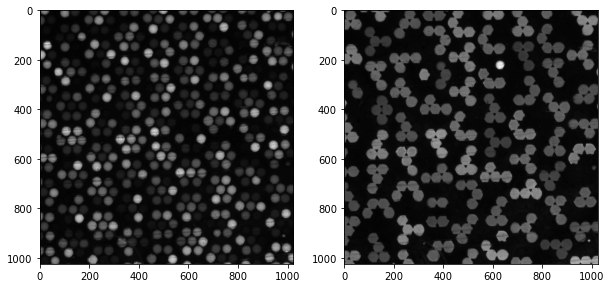

In [208]:
pre_c2=image1[1,:,:]
post_c2=image2[1,:,:]
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(pre_c2,cmap='gray')
ax[1].imshow(post_c2,cmap='gray')

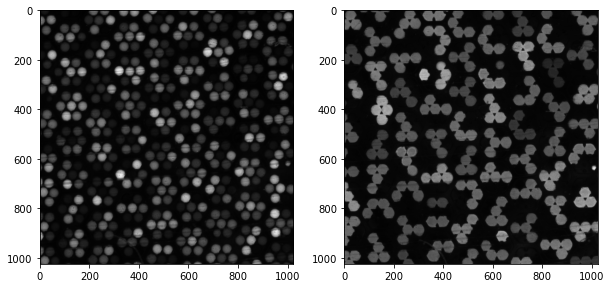

In [209]:
pre_c3=image1[2,:,:]
post_c3=image2[2,:,:]
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(pre_c3,cmap='gray')
ax[1].imshow(post_c3,cmap='gray')

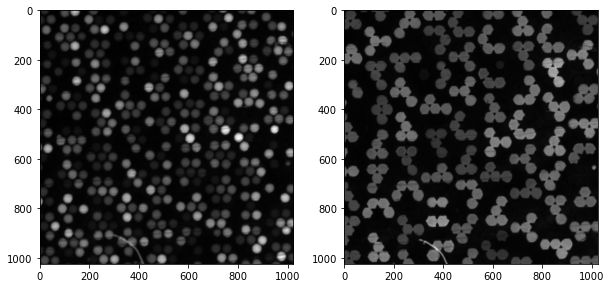

In [210]:
pre_c4=image1[3,:,:]
post_c4=image2[3,:,:]
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(pre_c4,cmap='gray')
ax[1].imshow(post_c4,cmap='gray')

In [15]:
pre_c5=image1[4,:,:]
post_c5=image2[4,:,:]

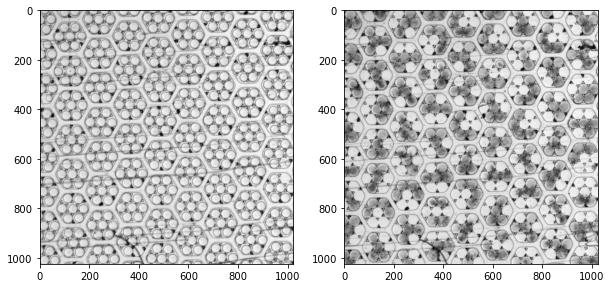

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(pre_c5,cmap='gray')
ax[1].imshow(post_c5,cmap='gray')

In [28]:
min_value = np.min(pre_c5)
max_value = np.max(pre_c5)
pre_c5_sc = ((pre_c5 - min_value) / (max_value - min_value) * 255).astype(np.uint8)
min_value = np.min(post_c5)
max_value = np.max(post_c5)
post_c5_sc = ((post_c5 - min_value) / (max_value - min_value) * 255).astype(np.uint8)

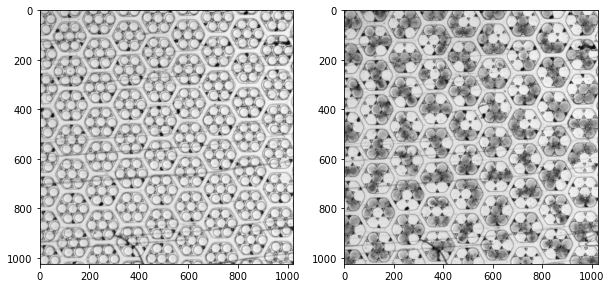

In [30]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(pre_c5_sc,cmap='gray')
ax[1].imshow(post_c5_sc,cmap='gray')

In [31]:
pre_c5_sc.dtype,post_c5_sc.dtype

(dtype('uint8'), dtype('uint8'))

### Edge detection

#### Edge detection with Sobel operator

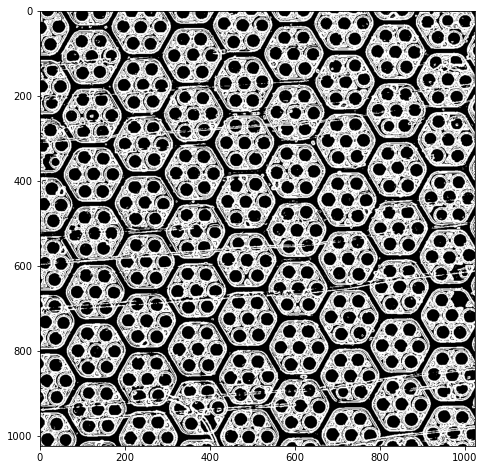

In [75]:
# Compute the gradient using the Sobel operator
gradient_x = cv2.Sobel(pre_c5_sc, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(pre_c5_sc, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Apply thresholding to detect edges
threshold = 80  # Adjust the threshold as needed
edge_image1 = (gradient_magnitude > threshold).astype(np.uint8) * 255

# Display the edge-detected image
plt.figure(figsize=(8,8))
plt.imshow(edge_image1,cmap='gray')

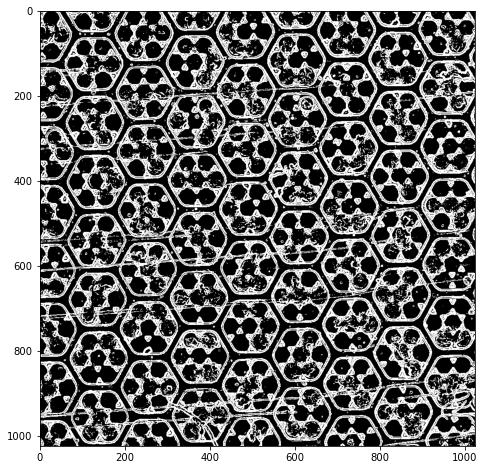

In [47]:
# Compute the gradient using the Sobel operator
gradient_x = cv2.Sobel(post_c5_sc, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(post_c5_sc, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Apply thresholding to detect edges
threshold = 90  # Adjust the threshold as needed
edge_image2 = (gradient_magnitude > threshold).astype(np.uint8) * 255

# Display the edge-detected image
plt.figure(figsize=(8,8))
plt.imshow(edge_image2,cmap='gray')

#### Edge detection with Canny Detector

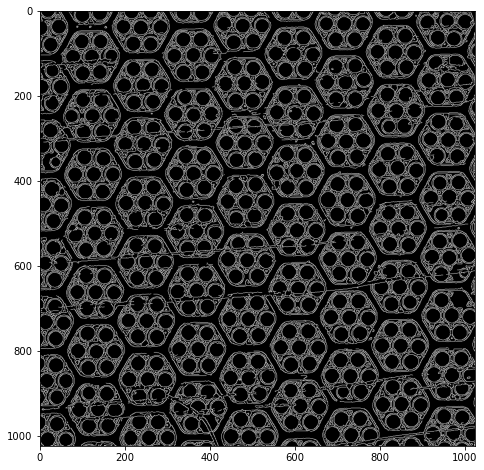

In [222]:
# Detecing the edge using Canny Detector
edge_img1 = cv2.Canny(image=pre_c5_sc, threshold1=100, threshold2=200)
plt.figure(figsize=(8,8))
plt.imshow(edge_img1,cmap='gray')

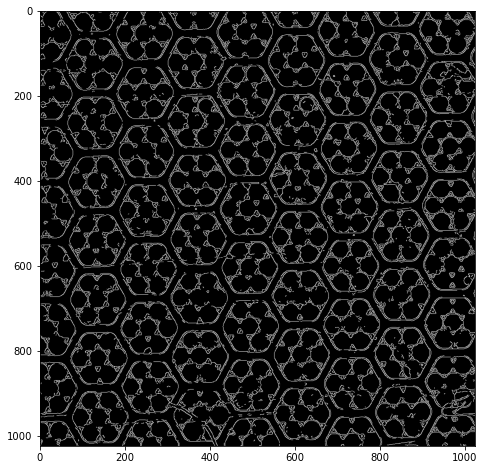

In [216]:
# Detecing the edge using Canny Detector
edge_img2 = cv2.Canny(image=post_c5_sc, threshold1=200, threshold2=255)
plt.figure(figsize=(8,8))
plt.imshow(edge_img2,cmap='gray')

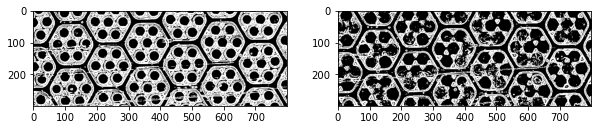

In [166]:
edge1_sub=edge_image1[:300,:800]
edge2_sub=edge_image2[:300,:800]
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(edge1_sub,'gray')
ax[1].imshow(edge2_sub,'gray')

In [158]:
from skimage import morphology

def fill_small_holes(image, hole_size_threshold):
    # Convert the input image to binary format
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Perform morphological closing to fill small holes
    filled_image = morphology.binary_closing(binary_image, morphology.disk(hole_size_threshold))

    # Convert the filled binary image back to grayscale
    filled_image = filled_image.astype(np.uint8) * 255

    return filled_image

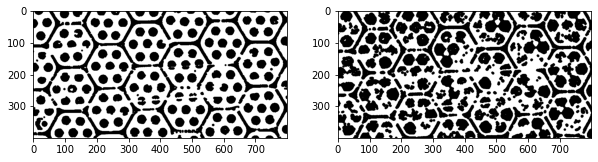

In [159]:
edge1_sub_fh= fill_small_holes(edge1_sub, 3)
edge2_sub_fh= fill_small_holes(edge2_sub, 4)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(edge1_sub_fh,'gray')
ax[1].imshow(edge2_sub_fh,'gray')

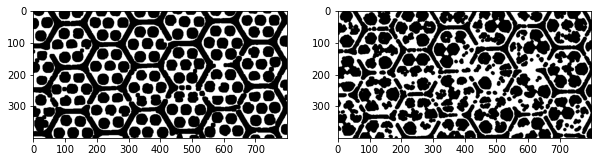

In [188]:
# Define the kernel (structuring element) for erosion
kernel1 = np.ones((3, 3), np.uint8)  # You can adjust the kernel size
kernel2 = np.ones((3, 3), np.uint8)
# Erode the image
edge1_sub_er = cv2.erode(edge1_sub_fh, kernel1, iterations=3)
edge2_sub_er = cv2.erode(edge2_sub_fh, kernel2, iterations=1)

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(edge1_sub_er,'gray')
ax[1].imshow(edge2_sub_er,'gray')

### Registration

In [167]:
from skimage.registration import phase_cross_correlation
from scipy.ndimage import fourier_shift

shift, error, diffphase = phase_cross_correlation(edge_image1, edge_image2)
shift

array([-17.,  -6.])

In [223]:
# Register the canny edge images
shift, error, diffphase = phase_cross_correlation(edge_img1, edge_img2)
shift

array([-17.,  -6.])

In [226]:
# Register the images using register_translation
from skimage.feature import register_translation
shifted, error, diffphase = register_translation(edge_img1, edge_img2)
shifted

C:\Users\Peng\anaconda3\lib\site-packages\skimage\feature\__init__.py:45: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


array([-17.,  -6.])

### Transformation

#### Transform the image with skimage.transform.EuclideanTransform

In [203]:
from skimage import transform
tform = transform.EuclideanTransform(
    translation = (-6, -17)
    )
tf_img = transform.warp(edge2_sub, tform.inverse)

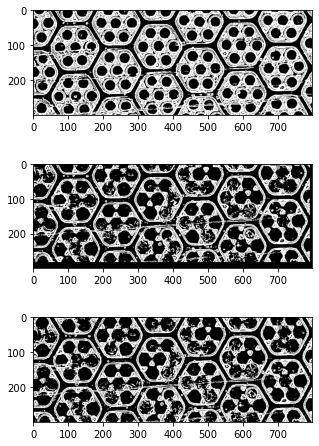

In [204]:
# Display the registered image
fig,ax=plt.subplots(3,1,figsize=(5,8))
ax[0].imshow(edge1_sub,'gray')
ax[2].imshow(edge2_sub,'gray')
ax[1].imshow(tf_img,'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


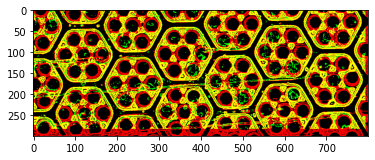

In [206]:
rgb_reg = np.zeros((edge1_sub.shape[0],edge1_sub.shape[1],3))
rgb_reg[:,:,0]=edge1_sub
rgb_reg[:,:,1]=tf_img
plt.imshow (rgb_reg)

#### Transform the image with scipy.ndimage.shift

In [227]:
# Transform the image with scipy.ndimage.shift
from scipy.ndimage import shift
tf_image = shift(edge2_sub,shift=(shifted[0],shifted[1]),mode='constant')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


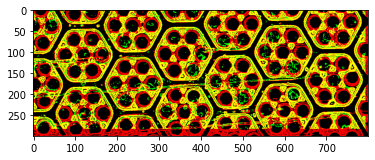

In [228]:
rgb_reg = np.zeros((edge1_sub.shape[0],edge1_sub.shape[1],3))
rgb_reg[:,:,0]=edge1_sub
rgb_reg[:,:,1]=tf_image
plt.imshow (rgb_reg)

### Well by Well Analysis

In [229]:
from skimage import io, color, measure

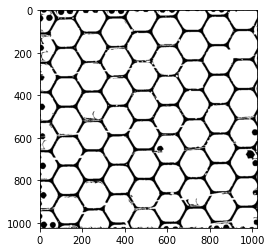

In [235]:
contours, hierarchy = cv2.findContours(edge_image1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(edge_image1.shape)
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours,cmap='gray')

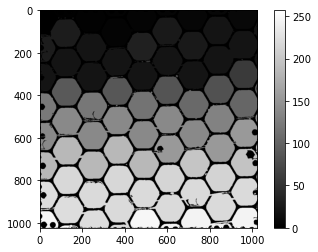

In [270]:
# Label connected regions in the binary image
labeled_image = measure.label(external_contours)
plt.imshow(labeled_image,cmap='gray')
plt.colorbar()

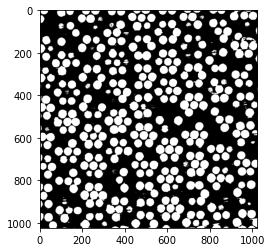

In [255]:
pre_c2_binary = (pre_c2/255)>10
pre_c2_binary = pre_c2_binary*255
plt.imshow(pre_c2_binary,'gray')

In [259]:
props = measure.regionprops(labeled_image,pre_c2_binary)

In [269]:
for i in range (0,labeled_image.max()):
    labeled_image_sub=measure.label(props[i].intensity_image)
    print (i,labeled_image_sub.max())

0 4
1 2
2 16
3 2
4 27
5 2
6 12
7 1
8 16
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 0
17 1
18 0
19 0
20 89
21 0
22 0
23 0
24 0
25 31
26 0
27 1
28 18
29 0
30 0
31 0
32 0
33 4
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 6
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 1
74 0
75 0
76 0
77 0
78 1
79 1
80 0
81 14
82 1
83 0
84 8
85 0
86 0
87 22
88 0
89 0
90 18
91 0
92 1
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 15
103 0
104 0
105 6
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 19
116 0
117 0
118 0
119 14
120 0
121 6
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 4
131 0
132 0
133 0
134 0
135 0
136 0
137 45
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 2
149 0
150 0
151 0
152 0
153 29
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182

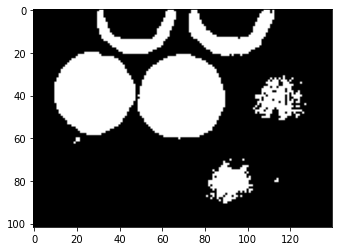

In [267]:
plt.imshow(props[2].intensity_image,'gray')